In [8]:
# import torch
from PIL import Image
import cv2
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("/home/timssh/ML/TAGGING/CLS/instance/runs/segment/train6/weights/best.pt")  # load a pretrained model (recommended for training)

def yolo(im, size=640):
    g = (size / max(im.size))  # gain
    im = im.resize((int(x * g) for x in im.size), Image.ANTIALIAS)  # resize

    results = model(im)  # inference
    # results.render()  # updates results.imgs with boxes and labels
    return Image.fromarray(results[0].plot())


In [16]:
# img = cv2.imread('/home/timssh/ML/TAGGING/6a4b9fa464a67a2c7b6cb21fbccb6f6f.jpeg')
# img = cv2.resize(img, (640, 480))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.open('/home/timssh/ML/TAGGING/6a4b9fa464a67a2c7b6cb21fbccb6f6f.jpeg')
img = img.resize((640, 480))
res = model(img)
# res = model(T.ToTensor()(img).unsqueeze(0))
res_plotted = res[0].plot()
cv2.imwrite('res_plotted.jpg', res_plotted)


0: 480x640 1 girl, 2.6ms
Speed: 17.0ms preprocess, 2.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


True

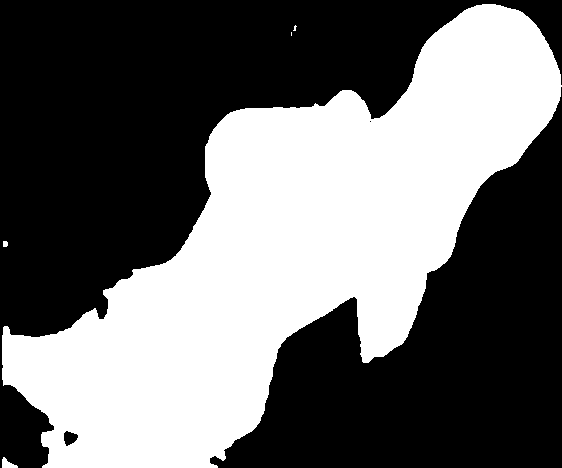

In [17]:
from ultralytics import YOLO
from torchvision import transforms as T
from PIL import Image
import cv2
import torch
import numpy as np

# model = YOLO('yolov8n-seg.pt')
# results = model('https://ultralytics.com/images/bus.jpg', imgsz=640)
# img = cv2.imread('bus.jpg')
# img = cv2.resize(img, (480, 640))

for result in res:
    for mask, bbox in zip(result.masks, result.boxes):
        r = bbox.xyxy[0].to(int)
T.ToPILImage()(mask.data[:, r[1]:r[3], r[0]:r[2]])

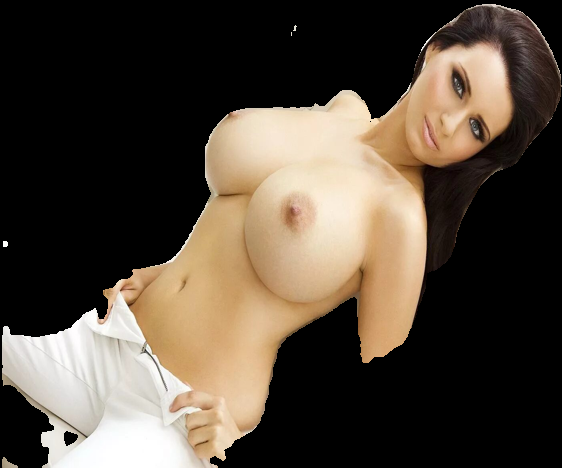

In [19]:
T.ToPILImage()(T.ToTensor()(np.array(img)[r[1]:r[3], r[0]:r[2]]) * mask.data[:, r[1]:r[3], r[0]:r[2]].to('cpu'))

In [14]:
import kornia as K

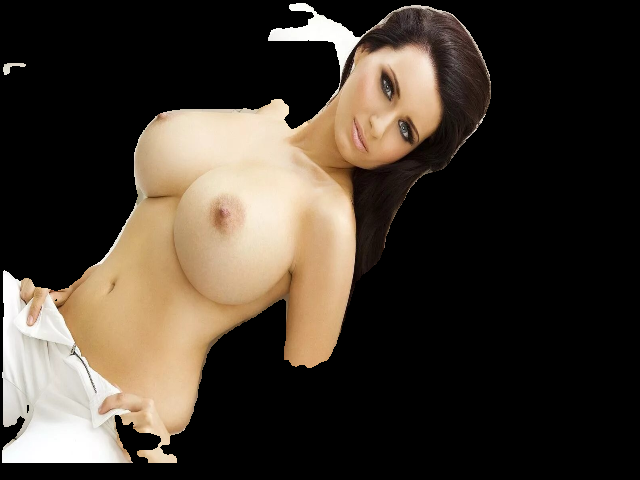

In [15]:
T.ToPILImage()(K.augmentation.PadTo((480, 640), keepdim=True)(T.ToTensor()(img[r[1]:r[3], r[0]:r[2]]) * mask.data[:, r[1]:r[3], r[0]:r[2]].to('cpu')))

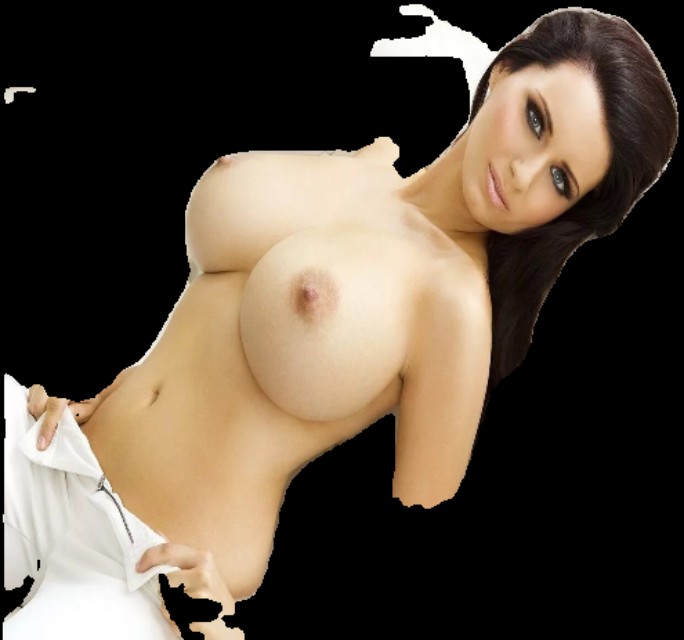

In [13]:
T.ToPILImage()(T.Pad(size=640)(T.ToTensor()(img[r[1]:r[3], r[0]:r[2]]) * mask.data[:, r[1]:r[3], r[0]:r[2]].to('cpu')))

In [51]:
mask.data[:, r[1]:r[3], r[0]:r[2]].shape, mask.data.shape

(torch.Size([1, 463, 495]), torch.Size([1, 480, 640]))

In [28]:
result.names

{0: 'Girl', 1: 'Man', 2: 'girl', 3: 'man'}

In [23]:
int(bbox.cls[0])

2

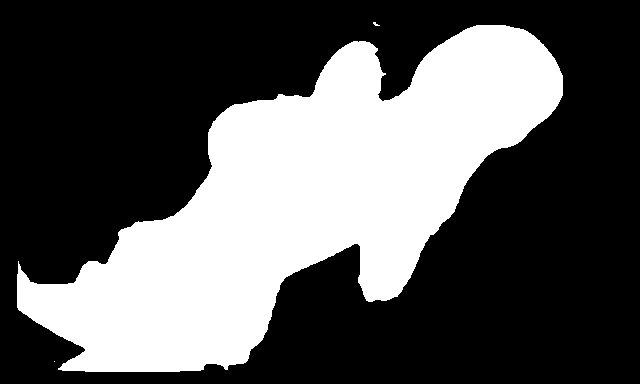

In [10]:
from torchvision import transforms as T
from PIL import Image
import torch
import numpy as np
import cv2

T.ToPILImage()(mask.data)